## 📖 Background
A company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

## Content
1. The Dataset
2. Analysis Plan
3. Exploratory Data Analysis
4. Feature Selection and Engineering
5. Clustering Implementation
6. Final Recommendation

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

## Importing dataset

In [2]:
df = pd.read_csv(r'C:\Users\felic\OneDrive\Documents\IronLabs\Final_Project/russia_alcohol.csv')
df.head(50)

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.10
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.10
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.40
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.30
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.20
5,1998,Republic of Bashkortostan,1.8,17.5,10.7,0.9,0.20
6,1998,Belgorod Oblast,3.4,23.0,10.8,0.9,0.10
7,1998,Bryansk Oblast,3.4,32.4,9.7,0.5,0.10
8,1998,Republic of Buryatia,1.1,8.8,15.8,0.9,0.10
9,1998,Vladimir Oblast,1.5,16.6,16.8,0.5,0.10


In [3]:
df.region.unique()

array(['Republic of Adygea', 'Altai Krai', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast',
       'Republic of Bashkortostan', 'Belgorod Oblast', 'Bryansk Oblast',
       'Republic of Buryatia', 'Vladimir Oblast', 'Volgograd Oblast',
       'Vologda Oblast', 'Voronezh Oblast', 'Republic of Dagestan',
       'Jewish Autonomous Oblast', 'Zabaykalsky Krai', 'Ivanovo Oblast',
       'Republic of Ingushetia', 'Irkutsk Oblast',
       'Kabardino-Balkar Republic', 'Kaliningrad Oblast',
       'Republic of Kalmykia', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Republic of Karelia',
       'Kemerovo Oblast', 'Kirov Oblast', 'Kostroma Oblast',
       'Krasnodar Krai', 'Krasnoyarsk Krai', 'Republic of Crimea',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Republic of Mordovia', 'Moscow', 'Moscow Oblast',
       'Murmansk Oblast', 'Nenets Autonomous Okrug',
       'Nizh

## Checking Dtypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [5]:
df.nunique()

year          19
region        85
wine         210
beer         796
vodka        313
champagne    107
brandy        76
dtype: int64

In [6]:
# Get summary statistics for the cleaned dataset
df.describe(include = 'all')

,year,region,wine,beer,vodka,champagne,brandy
count,1615.000000,1615,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN
top,NaN,Republic of Adygea,NaN,NaN,NaN,NaN,NaN
freq,NaN,19,NaN,NaN,NaN,NaN,NaN
mean,2007.000000,NaN,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,NaN,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,NaN,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,NaN,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,NaN,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,NaN,7.377500,67.400000,15.000000,1.665000,0.700000


There are 85 unique regions, and the "Republic of Adygea" has the most by number of years (19 years). Beer is the most consumed on average, followed by vodka. Brandy is the least consumed alcohol

#### We will explore the dataset with mathematical and visualization techniques. We need to answer the following questions

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

## 1. The Dataset (The meaning of each column)
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

### 1.1 Key Variables

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

## Checking to see if there are any high corrrelations between

In [7]:
matrix=df.corr()

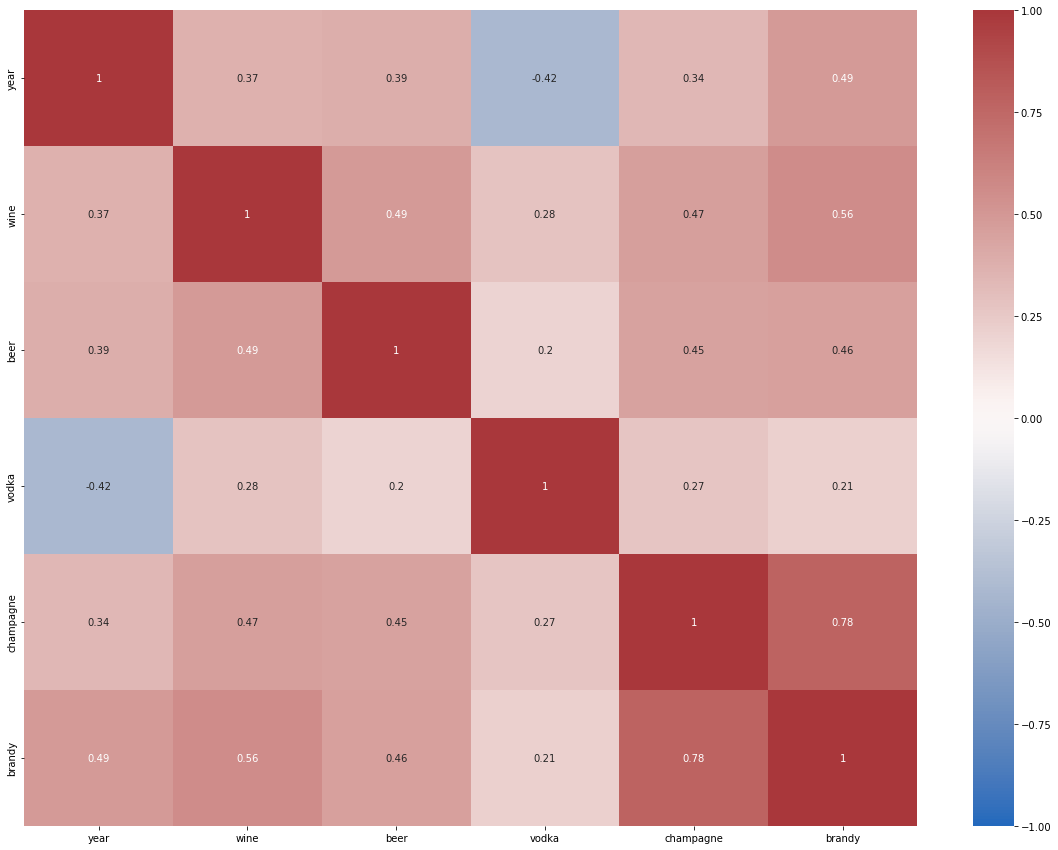

In [8]:
plt.figure(figsize=(20,15))

sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

There is a high correlation between champagne and brandy, this is to say that promoting the sale of champagne could lead to a high demand of brandy

## checking for missing values

In [8]:
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

In [9]:
# Define segments
segments = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
segments_shr = [s + '_shr' for s in segments]

# Check missing values
nan_count = df[df[segments].isnull().any(axis=1)]
nan_count['na_count'] = nan_count[segments].isnull().sum(axis=1)

C:\Users\felic\AppData\Local\Temp/ipykernel_15460/2057522207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_count['na_count'] = nan_count[segments].isnull().sum(axis=1)


In [10]:
nan_count

,year,region,wine,beer,vodka,champagne,brandy,na_count
17,1998,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN,5
31,1998,Republic of Crimea,NaN,NaN,NaN,NaN,NaN,5
63,1998,Sevastopol,NaN,NaN,NaN,NaN,NaN,5
79,1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN,5
102,1999,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...
1439,2014,Chechen Republic,NaN,4.9,NaN,NaN,NaN,4
1462,2015,Republic of Ingushetia,NaN,0.5,NaN,NaN,NaN,4
1524,2015,Chechen Republic,NaN,2.2,NaN,NaN,NaN,4
1547,2016,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN,5


In [11]:
nan_count['na_count']

17      5
31      5
63      5
79      5
102     5
       ..
1439    4
1462    4
1524    4
1547    5
1609    4
Name: na_count, Length: 66, dtype: int64

In [12]:
## filling null values
nan_pivot = nan_count.pivot_table(index='region', columns='year', values='na_count', aggfunc='sum').fillna(0)
nan_pivot.head(10)

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
region,,,,,,,,,,,,,,,,,,,
Chechen Republic,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0
Republic of Crimea,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0
Republic of Ingushetia,5.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0
Sevastopol,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0


Handling missing values
Based on the counts above, it would make sense to completely drop regions with most of the data missing - Chechen Republic, Republic of Crimea, Republic of Ingushetia and Sevastopol

In [13]:
print(df.shape)
df = df[~df.region.isin(nan_pivot.index.to_list())]
print(df.shape)

(1615, 7)
(1539, 7)


In [14]:
df.isna().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

### Geo Location
For geolocation, we need to get coordinates to display stat on the map. For that we need:

* geopy -> Nominatim
* creating user agent to connect to geopy server.
* create lat and lon function to extract latitude and longitude using the name of the place.
* value count the region column, resetting index, and then renaming columns.
* applying both functions on to geo['region']
* export the file as "russian_geo.csv"
This process takes 5 minutes to run so we are just going to save the results in a .csv file and later merge it with our main database.

In [15]:
import time
from geopy.geocoders import Nominatim

app = Nominatim(user_agent="russia")

def lat(x): 
    time.sleep(1)
    try:
        return app.geocode(x).raw["lat"]
    except:
        return lat(x)   
    
def lon(x):    
    time.sleep(1)
    try:
        return app.geocode(x).raw["lon"]
    except:
        return lon(x)   

geo = df['region'].value_counts()
geo = geo.to_frame().reset_index().rename(columns={"region":"count","index":"region"})
geo['lat'] = geo['region'].apply(lat)
geo['lon'] = geo['region'].apply(lon)

geo.drop('count',axis=1).to_csv("./russian_geo.csv",index=False)

In [16]:
geo

,region,count,lat,lon
0,Republic of Adygea,19,44.6939006,40.1520421
1,Nizhny Novgorod Oblast,19,55.4718033,44.0911594
2,Sakhalin Oblast,19,50.14070305,143.05293211857946
3,Saratov Oblast,19,51.6520555,46.8631952
4,Saint Petersburg,19,59.917857350000006,30.380619357025516
...,...,...,...,...
76,Kirov Oblast,19,57.9665589,49.4074599
77,Kemerovo Oblast,19,54.2353319,85.3785008
78,Republic of Karelia,19,62.6194031,33.4920267
79,Karachay-Cherkess Republic,19,43.7368326,41.7267991


In [16]:
df

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


* loading geo location dataset.
* merging it with main dataset.
* group by "region" and mean.
* sort values by "beer" descending.
* We are going to use df_geo dataset to plot the total alcohol consumption on the Plotly map in tableau

In [18]:
geo = pd.read_csv("./russian_geo.csv")
df_geo = (
    pd.merge(df, geo, on="region")
    .groupby("region")
    .mean()
    .reset_index()
    .sort_values("beer", ascending=False)
)

In [19]:
data=pd.merge(df, geo, on = "region", how = "outer")

In [20]:
data

,year,region,wine,beer,vodka,champagne,brandy,lat,lon
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,44.693901,40.152042
1,1999,Republic of Adygea,2.3,11.2,4.3,0.3,0.1,44.693901,40.152042
2,2000,Republic of Adygea,3.1,27.4,5.4,0.6,0.1,44.693901,40.152042
3,2001,Republic of Adygea,3.8,22.0,7.8,0.5,0.1,44.693901,40.152042
4,2002,Republic of Adygea,4.4,30.4,7.9,0.7,0.3,44.693901,40.152042
...,...,...,...,...,...,...,...,...,...
1534,2012,Yaroslavl Oblast,9.7,73.4,12.7,1.9,1.1,57.778198,39.002110
1535,2013,Yaroslavl Oblast,7.6,79.3,11.1,1.7,1.0,57.778198,39.002110
1536,2014,Yaroslavl Oblast,9.9,60.9,9.8,1.5,1.0,57.778198,39.002110
1537,2015,Yaroslavl Oblast,9.3,39.0,8.7,1.4,0.9,57.778198,39.002110


In [17]:
# total alcohol level
df['total_alc'] = df.apply(lambda x: x.wine + x.beer + x.vodka + x.champagne + x.brandy, axis=1)
df

,year,region,wine,beer,vodka,champagne,brandy,total_alc
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5


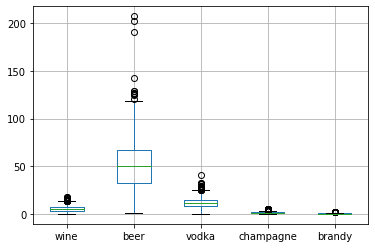

In [18]:
#checking for outliers

boxplot = df.boxplot(column=[ 'wine', 'beer', 'vodka', 'champagne', 'brandy'])  

In [19]:
 #save data to csv
df.to_csv(r'C:\Users\felic\OneDrive\Documents\IronLabs\Final_Project\alcohol_cleaned2.csv')

## EDA

In [20]:
df

,year,region,wine,beer,vodka,champagne,brandy,total_alc
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5


In [21]:

# Add consumption as share of total
for s in segments:
    df[s + '_shr'] = df.apply(lambda x: x[s] / x.total_alc, axis=1)

In [22]:

# Subset Sain Petersburg
spb_df = df[df['region'] == 'Saint Petersburg'].set_index('year')

In [23]:
spb_df

,region,wine,beer,vodka,champagne,brandy,total_alc,wine_shr,beer_shr,vodka_shr,champagne_shr,brandy_shr
year,,,,,,,,,,,,
1998,Saint Petersburg,2.7,27.90,12.30,1.20,0.50,44.60,0.060538,0.625561,0.275785,0.026906,0.011211
1999,Saint Petersburg,2.6,57.40,13.00,1.70,0.60,75.30,0.034529,0.762284,0.172643,0.022576,0.007968
2000,Saint Petersburg,4.4,68.20,14.70,2.00,0.90,90.20,0.048780,0.756098,0.162971,0.022173,0.009978
2001,Saint Petersburg,6.2,101.00,15.50,2.40,0.80,125.90,0.049245,0.802224,0.123114,0.019063,0.006354
2002,Saint Petersburg,6.3,104.60,17.20,2.60,0.90,131.60,0.047872,0.794833,0.130699,0.019757,0.006839
2003,Saint Petersburg,6.6,105.60,14.30,2.80,1.00,130.30,0.050652,0.810437,0.109747,0.021489,0.007675
2004,Saint Petersburg,4.7,103.90,13.90,2.50,0.80,125.80,0.037361,0.825914,0.110493,0.019873,0.006359
2005,Saint Petersburg,10.3,104.80,16.20,2.40,1.10,134.80,0.076409,0.777448,0.120178,0.017804,0.008160
2006,Saint Petersburg,7.6,125.30,16.40,2.40,1.40,153.10,0.049641,0.818419,0.107120,0.015676,0.009144


In [24]:
# Subset Sain Petersburg
spb_df = df[df['region'] == 'Saint Petersburg'].set_index('year')

In [25]:
segments = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
segments_shr = [s + '_shr' for s in segments]

In [27]:
# Set up seaborn 
sns.set_context('talk')

# Set up charting function
def spb_charts():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5), tight_layout=True)
    sns.lineplot(data=spb_df['total_alc'], ax=ax1)
    ax1.set_title('Total alcohol comsumption in St Petersburg', fontsize=20)
    ax1.set(xlabel = 'year', ylabel = 'l per capita',xlim = (1995, 2018))
    ax1.legend('')
    
    sns.lineplot(data=spb_df[segments_shr], ax=ax2)
    ax2.set_title('Alcohol segments, St Petersburg', fontsize=20)
    ax2.set(xlabel = 'year',ylabel = 'segment share of total',xlim = (1995, 2018))
    ax2.legend(['wine', 'beer', 'vodka', 'champagne', 'brandy'])
    plt.show() 

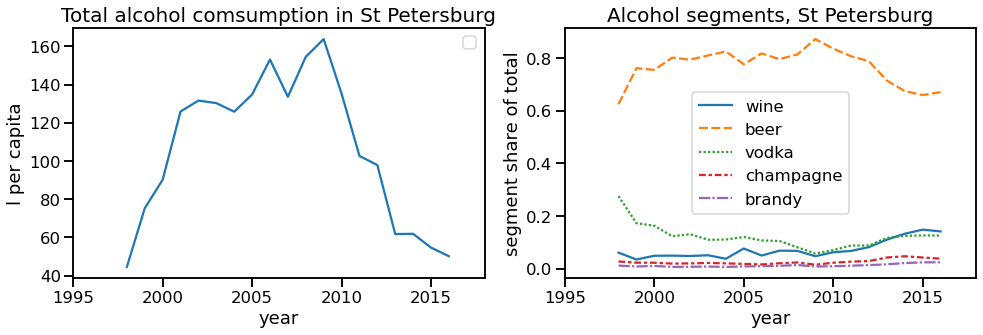

In [28]:
spb_charts()

#### Conclusions

* Overall alcohol consumtion peaked in 2010 and steadily declined after dropping back to pre-millenial levels
* Beer represents the highest share of all segments and was the driver of peak and decline
* Wine share of alcohol consumption has been steadily growing across observed period while other segments were mostly flat.
#### Now let's compare these trends with national averages.

### Alcohol consumption past trends

In [29]:
import plotly.graph_objects as go
import plotly.express as px
year_df = (
    df.groupby("year")
    .mean()
    .stack(0)
    .reset_index()
    .rename(columns={"level_1": "type", 0: "consumption"})
)
# year_df['total'] = year_df['wine']+year_df['brandy']+year_df['vodka']+year_df['beer']+year_df['champagne']
fig = px.scatter(
    year_df,
    x="type",
    y="consumption",
    animation_frame="year",
    color="type",
    size="consumption",
    size_max=55,
    # range_x=[100,100000],
    range_y=[0, 60],
)

# fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [30]:
# Set up comparisons
segs = segments + ['total_alc']

In [31]:
subset = pd.DataFrame()
def seg_series(reg='nat', s='total_alc'):
    """Returns pandas series with national average or Saint Petersburg for segment s
    Args:
        reg: input for region, nat or spb
        s:   segment to select (can be total_alc)
    """
    if reg == 'spb':
        subset = df[df['region'] == 'Saint Petersburg']
    else:
        subset = df
    if s == 'total_alc':
        return subset.groupby(by='year')[s].mean()
    return subset.groupby(by='year')[s+'_shr'].mean()*100 # Turn into %

In [32]:
# Create series for charts
for s in segs:
    # National average
    subset['nat_' + s] = seg_series(s=s)
    # Spb 
    subset['spb_' + s] = seg_series(reg='spb', s=s)

In [33]:
# Labels and options
lbls = ['National', 'St Petersburg']

def spb_vs_nat_charts():
    """Plots the charts comparing Spb to National average"""
    fig, axes = plt.subplots(2, 3, figsize=(14, 8), tight_layout=True)
    for s, ax in zip(segs, axes.flatten()):
        sns.lineplot(ax=ax, data=subset[['nat_'+s, 'spb_'+s]])
        if s == 'total_alc':
            ax.set_title('Alcohol consumption, l per capita')
        else:
            ax.set_title(s.title() + ' as % of alcohol')
        ax.set(
            xlabel = 'year',
            xlim = (1995, 2018)
        )
        ax.legend(lbls)
    plt.show()

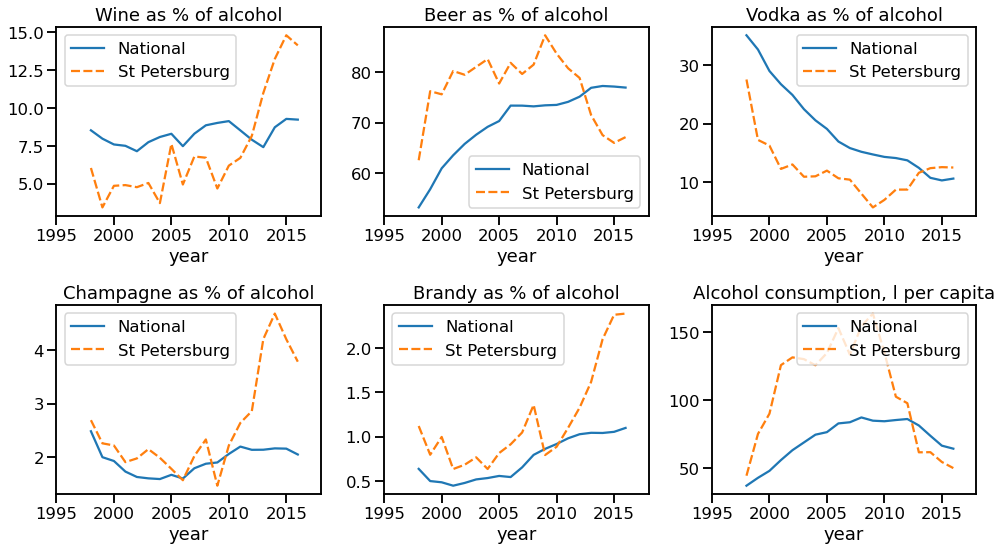

In [34]:
spb_vs_nat_charts()

#### Conclusions
Saint Petersburg appears to show a significant trend differences vs. national average starting from year 2010 onwards. The segments that show vastly different dynamics are:
- **Wine as % of alcohol** - significantly faster **consumption share growth** trend from 2010 surpassing national average. 
- **Beer as % of alcohol** - sharp drop from 2010 and dropping below national average (which is still growing). It's worth noting that beer was the primary driver of alcohol consumption in Saint Petersburg and was largely responsible for this region being 1.5x higher compared to national during 2000-2009 decade, but after that consumption started shifting from beer to other segments indicating consumer preference for variety.
- **Vodka as % of alcohol** - after following national decline trend until 2010, it started growing again surpassing national average.
- **Champagne and Brandy as % of alcohol** - show similarly fast growth pattern starting from 2010 and reaching doubled the share compared to national average.

**Bottom line**   
Consumers in Saint Petersburg region reduced overall alcohol consumption faster than national, at the same time the market shares shifted significantly between different types of alcohol. Hence we need to focus not only on absolute shares of different segments, but also the dynamics starting from 2010 onwards in our feature selection for clustering.

## Correlation between features

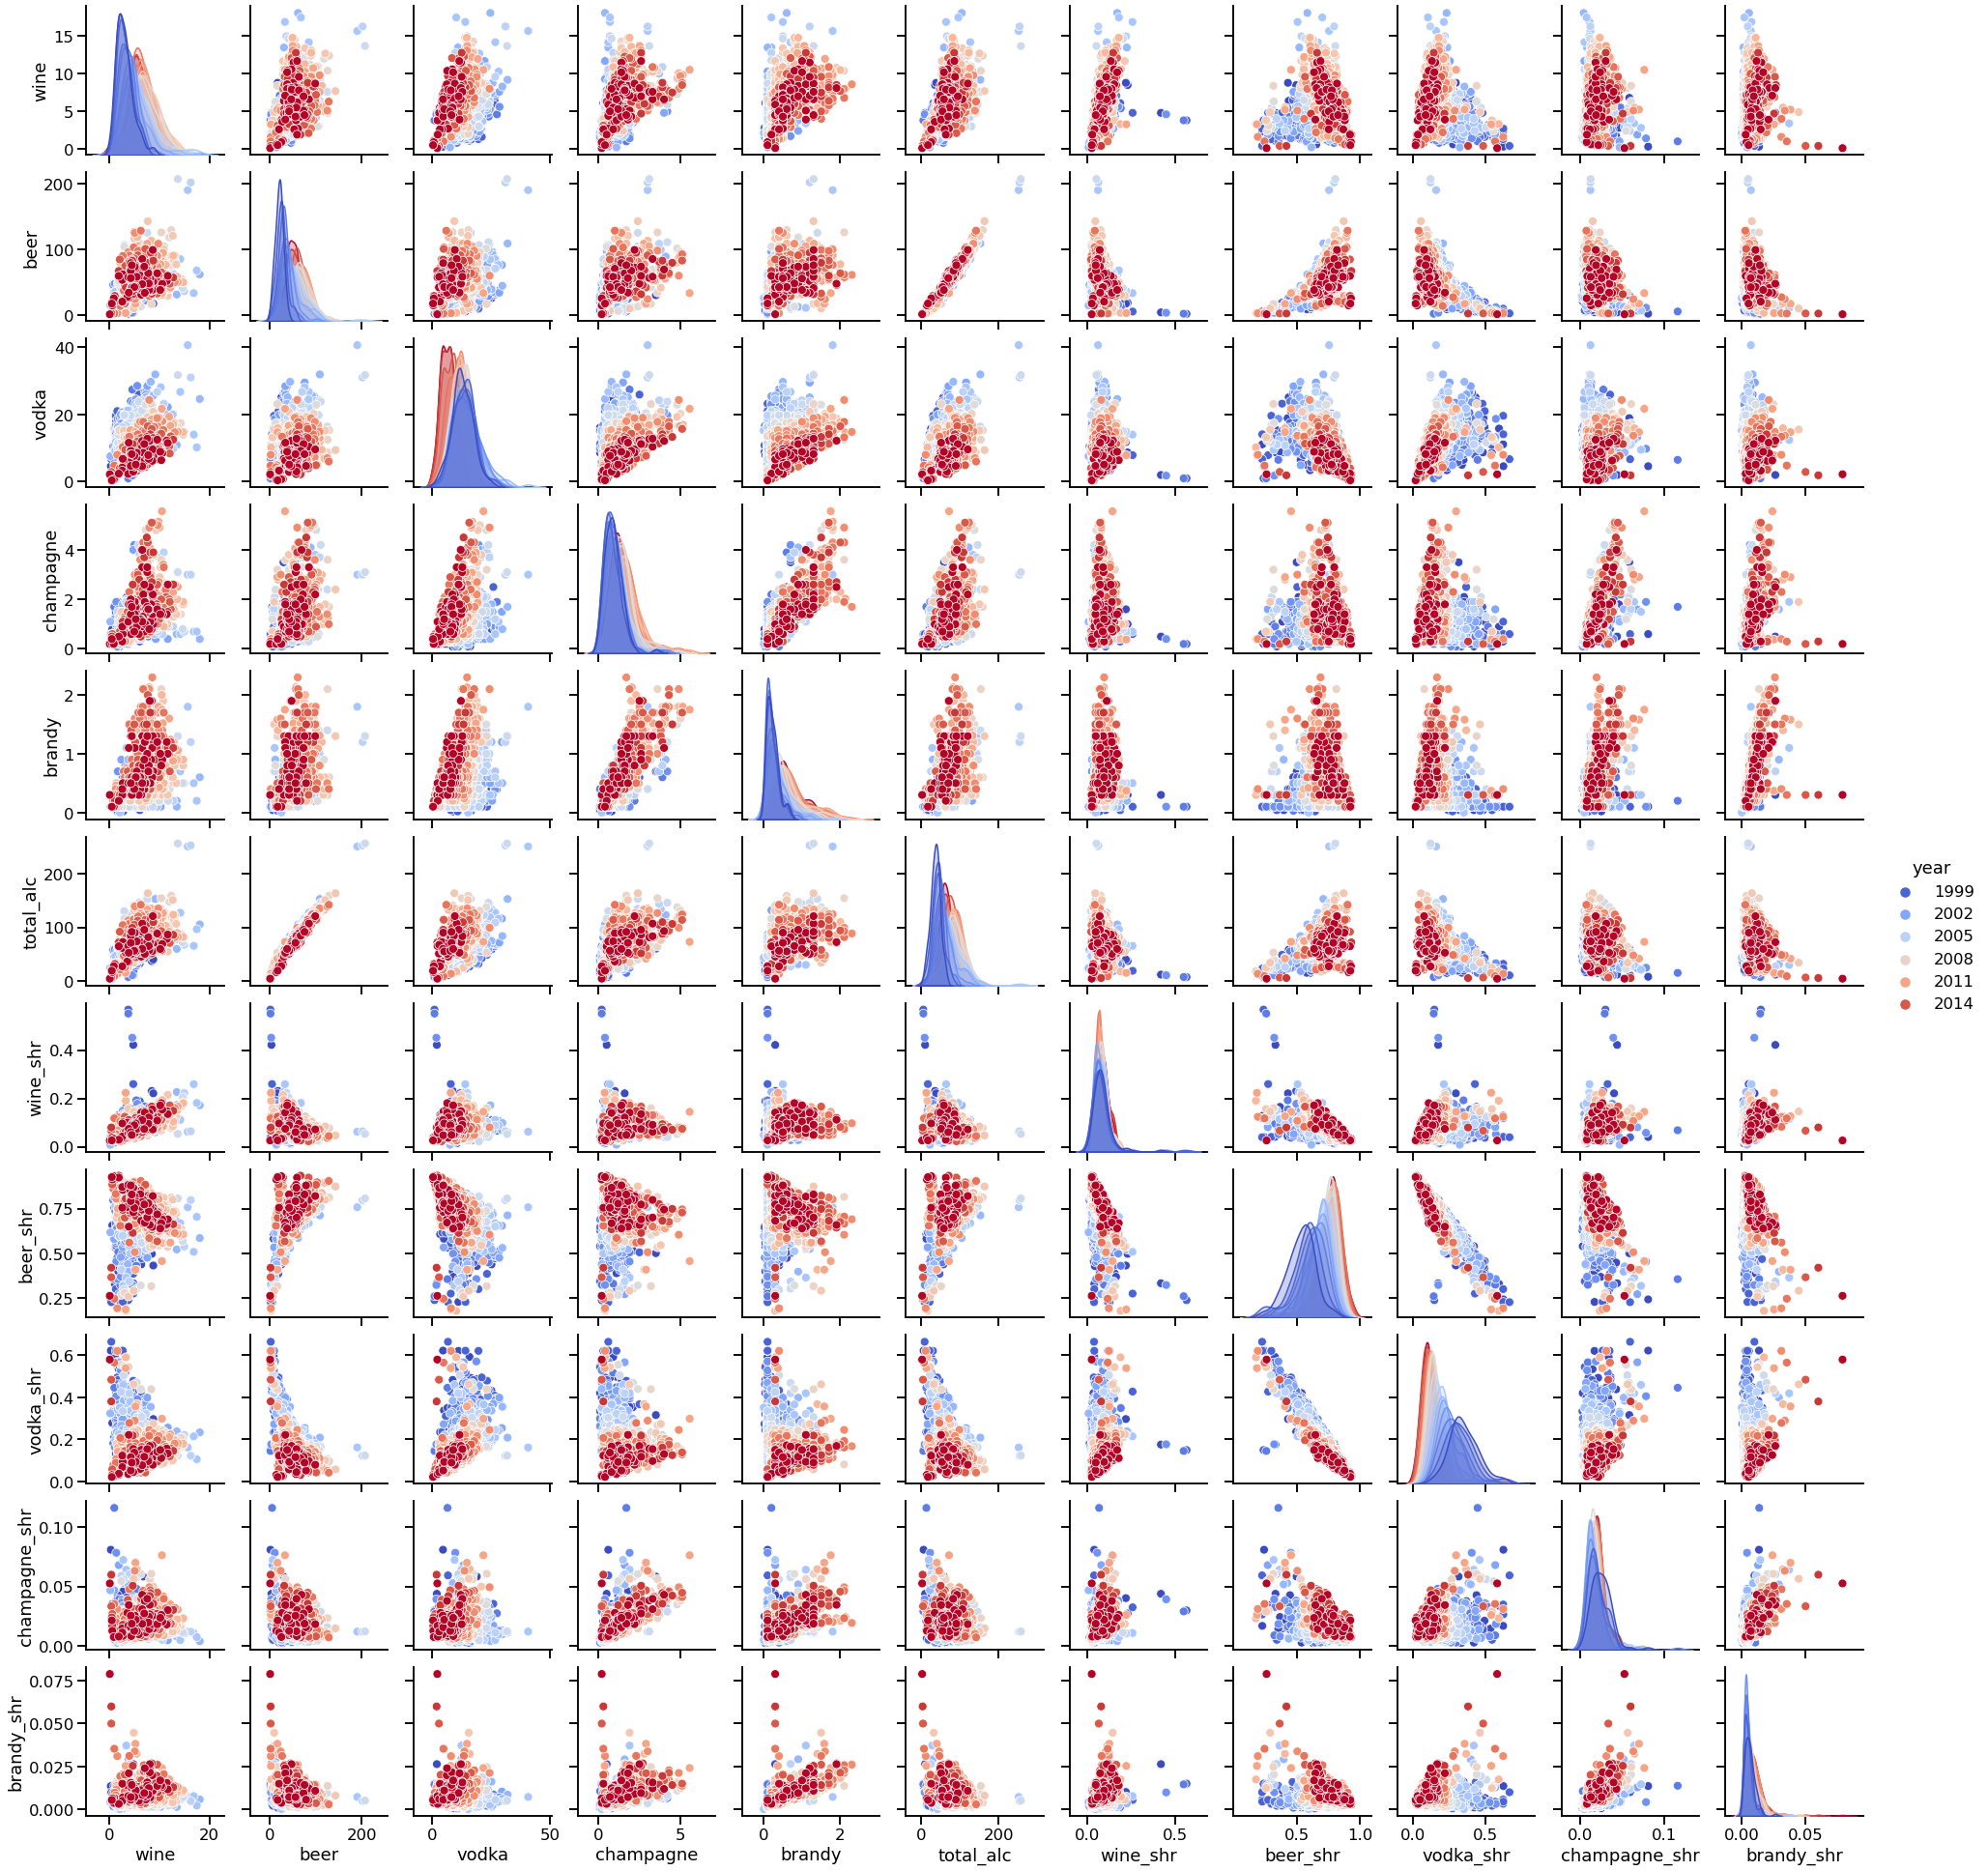

In [36]:
sns.pairplot(df, hue ="year", palette ='coolwarm')

#### We can observe for the correlation between paired alcohol, we see that there is an almost linear correlation between champagne and brandy, this is to say that the higher consumption champagne will also lead to a high consumption of brandy

## KMeans Clustering
First, we need to find how many clusters are there in our data, before that we need to create our X for that we are going to group the dataset by "region" and take average values. Then we are going to run SKlearn KMeans on a range from 1 to 9.

C:\Users\felic\AppData\Local\Temp/ipykernel_15460/1485990278.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

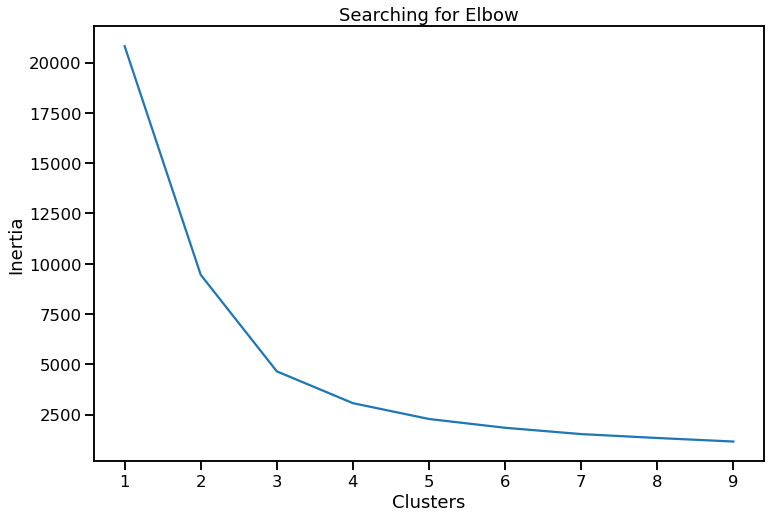

In [37]:
#searching for elbow
X = df.groupby(["region"])["wine", "beer", "vodka", "champagne", "brandy"].mean()

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title("Searching for Elbow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia");

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memor

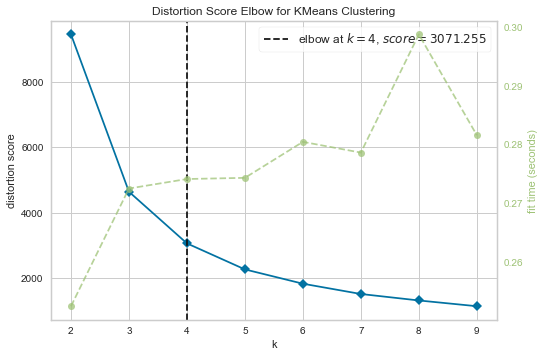

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
#Defining right amount of cluster using Elbow method
#5 clusters with kmeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(X)
visualizer.poof()

## looking at lon and lat clusters

In [41]:
data =data[["region","wine", "beer", "vodka", "champagne", "brandy","lon","lat","total_alc"]]
data

,region,wine,beer,vodka,champagne,brandy,lon,lat,total_alc
0,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,40.152042,44.693901,14.5
1,Republic of Adygea,2.3,11.2,4.3,0.3,0.1,40.152042,44.693901,35.0
2,Republic of Adygea,3.1,27.4,5.4,0.6,0.1,40.152042,44.693901,41.7
3,Republic of Adygea,3.8,22.0,7.8,0.5,0.1,40.152042,44.693901,27.3
4,Republic of Adygea,4.4,30.4,7.9,0.7,0.3,40.152042,44.693901,31.4
...,...,...,...,...,...,...,...,...,...
1534,Yaroslavl Oblast,9.7,73.4,12.7,1.9,1.1,39.002110,57.778198,48.8
1535,Yaroslavl Oblast,7.6,79.3,11.1,1.7,1.0,39.002110,57.778198,72.5
1536,Yaroslavl Oblast,9.9,60.9,9.8,1.5,1.0,39.002110,57.778198,61.4
1537,Yaroslavl Oblast,9.3,39.0,8.7,1.4,0.9,39.002110,57.778198,47.9


c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



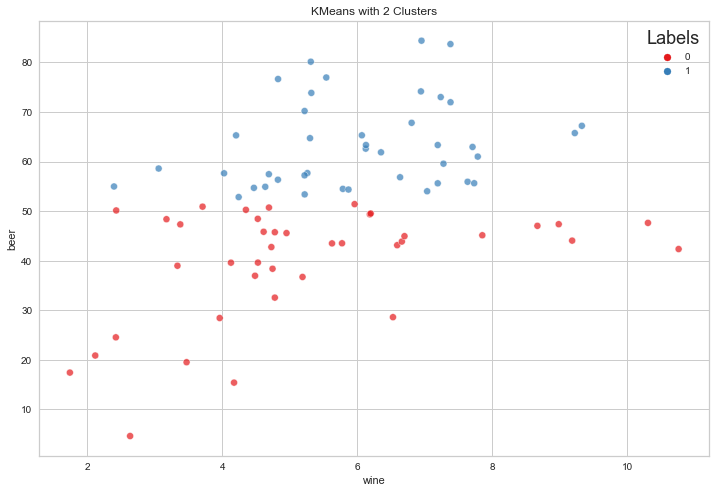

In [39]:
## n_cluster=2
km = KMeans(n_clusters=2).fit(X)
X1=X
X1["Labels"] = km.predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(X1["wine"], X1["beer"], hue=X1["Labels"], palette="Set1", alpha=0.7)
plt.title("KMeans with 2 Clusters")
plt.show()

In [40]:
from sklearn import metrics
from sklearn.cluster import KMeans
l= km.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, l, metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(X, l))

Silhouette Coefficient: 0.618
calinski_harabasz: 95.250


c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



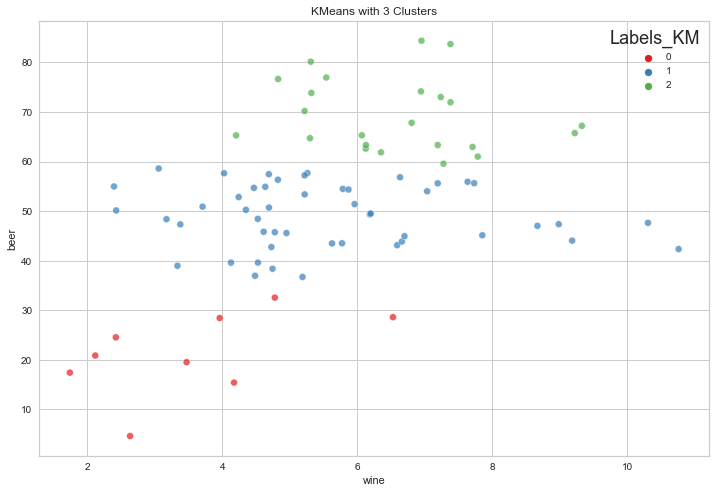

In [47]:
## n_cluster=3
km3 = KMeans(n_clusters=3).fit(X)
X1=X
X1["Labels_KM"] = km3.predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(X1["wine"], X1["beer"], hue=X1["Labels_KM"], palette="Set1", alpha=0.7)
plt.title("KMeans with 3 Clusters")
plt.show()

In [48]:
l= km3.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, l, metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(X, l))

Silhouette Coefficient: 0.710
calinski_harabasz: 135.749


c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



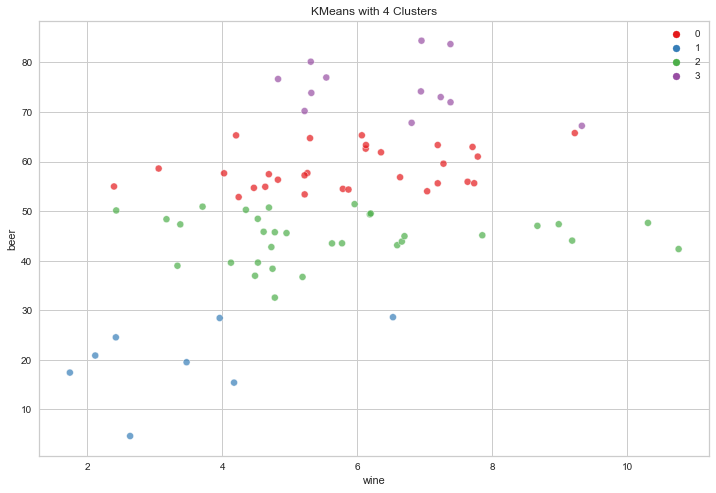

In [49]:
## n_cluster=4
km4 = KMeans(n_clusters=4).fit(X)
X1=X
y_hat = km4.predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(X1["wine"], X1["beer"], hue=y_hat, palette="Set1", alpha=0.7)
plt.title("KMeans with 4 Clusters")
plt.show()

In [46]:
l4= km4.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, l4, metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(X, l4))

Silhouette Coefficient: 0.636
calinski_harabasz: 148.321


## DBSCAN

In [50]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

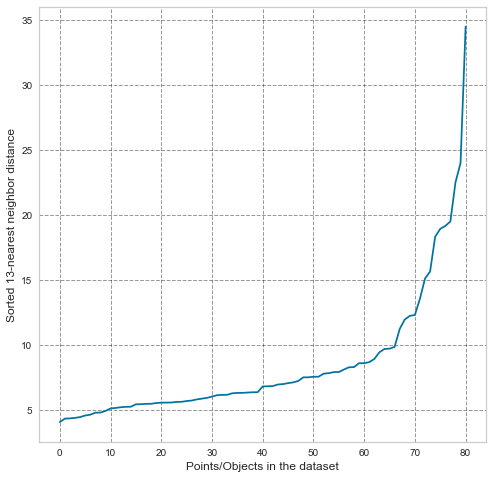

In [51]:
#Selecting hyperparameters for dbscan
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2* X.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=X, k=k)

In [54]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 10, min_samples = 10).fit(X) # fitting the model
X1['labels_DBSCAN'] = dbscan.labels_ # getting the labels

from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, X1['labels_DBSCAN'], metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(X, X1['labels_DBSCAN']))

Silhouette Coefficient: 0.713
calinski_harabasz: 48.739


c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



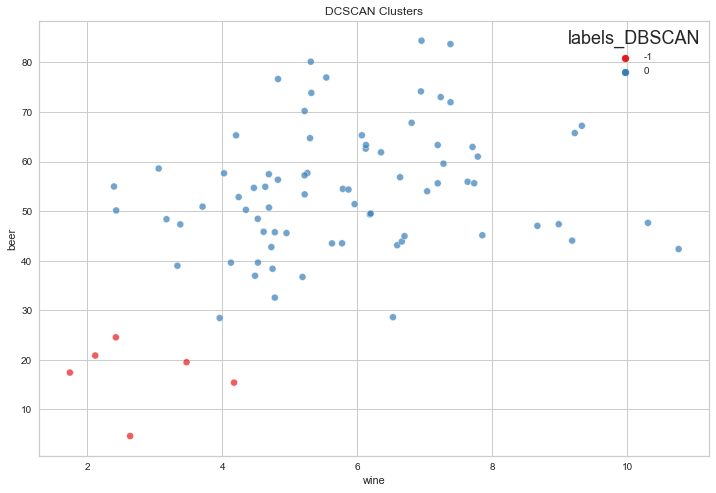

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(X1["wine"], X1["beer"], hue=X1['labels_DBSCAN'], palette="Set1", alpha=0.7)
plt.title("DCSCAN Clusters")
plt.show()

We realise that DBSCAN with eps=9 and min_samples =10 gave a good coefficient

We will do a comparison between other alcohol brands

In [57]:
X1.drop(['Labels'],axis=1)

,wine,beer,vodka,champagne,brandy,Labels_KM,labels_DBSCAN
region,,,,,,,
Altai Krai,3.174211,48.373158,9.465789,1.207368,0.236842,1,0
Altai Republic,5.190000,36.724211,9.683684,0.934737,0.253684,1,0
Amur Oblast,5.221579,53.377368,14.216842,1.115789,0.396842,1,0
Arkhangelsk Oblast,8.670000,47.036842,17.381053,1.631053,0.870526,1,0
Astrakhan Oblast,4.469474,54.695263,9.296842,0.861579,0.361053,1,0
...,...,...,...,...,...,...,...
Vologda Oblast,9.328421,67.206842,17.217895,0.857368,0.517895,2,0
Voronezh Oblast,4.637895,54.911053,9.916316,1.500000,0.402105,1,0
Yamalo-Nenets Autonomous Okrug,5.312105,80.137895,15.093158,1.485789,0.951579,2,0


c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\felic\Anaconda3\envs\downgrade\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'vodka V/S beer')

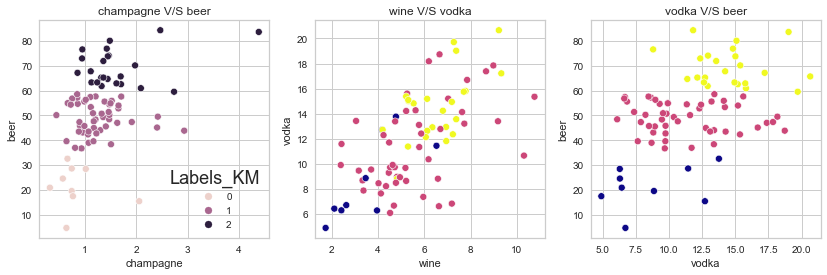

In [58]:
# Columns to visualize are Detergents_Paper as X and Milk as y
fig, ax = plt.subplots(1, 3, figsize=(14,4))
sns.scatterplot( X1["champagne"], X1["beer"],X1["Labels_KM"], cmap= "plasma",ax=ax[0] )
ax[0].set_title("champagne V/S beer") # plotting the clusters
sns.scatterplot( X1["wine"], X1["vodka"],c = X1["Labels_KM"], cmap= "plasma",ax=ax[1])
ax[1].set_title("wine V/S vodka") # plotting the clusters
sns.scatterplot(X1["vodka"], X1["beer"],c = X1["Labels_KM"], cmap= "plasma", ax=ax[2], palette = 'deep')
ax[2].set_title("vodka V/S beer")


#### Here from observing kmeans models for different clusters, we realise that using the numbers of clusters to be three gave a better results than using two clusters. 
Now we will perform two other models which are the DBSCAN and Agglomerative clustering and compare models for the best.

## Agglomerative Clustering

In [59]:
import scipy.cluster.hierarchy as shc
from scipy.spatial import distance_matrix 
dist = distance_matrix(X, X)
Z = shc.linkage(dist, "average")

C:\Users\felic\AppData\Local\Temp/ipykernel_15460/761564065.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



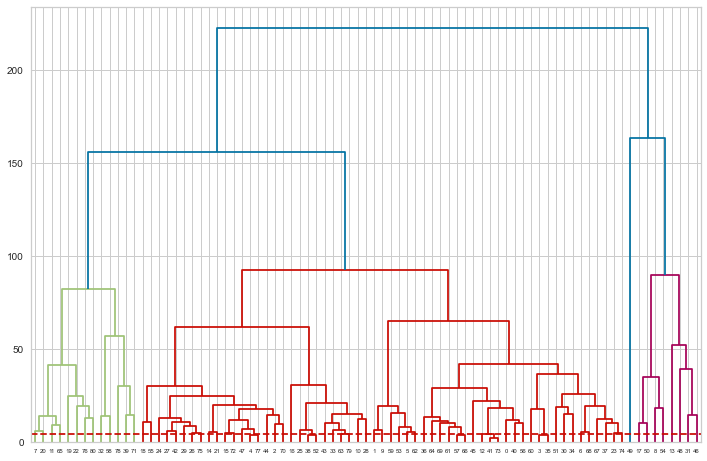

In [60]:
plt.figure(figsize=(12, 8))
dendro = shc.dendrogram(Z, leaf_rotation=0, leaf_font_size=6)
plt.axhline(y=4, color='r', linestyle='--')

In [64]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
X1["labels_agg"]=cluster.fit_predict(X)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, X1["labels_agg"], metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(X, X1["labels_agg"]))

Silhouette Coefficient: 0.640
calinski_harabasz: 100.441


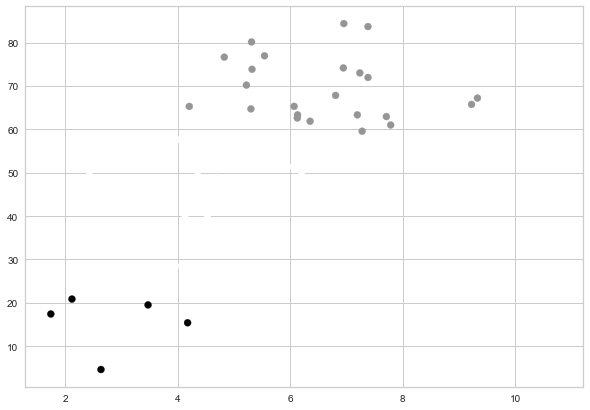

In [65]:
plt.figure(figsize=(10, 7))  
plt.scatter(X1["wine"], X1["beer"], c=cluster.labels_) 

## Cluster swarmplot

Let's visualize our results using Swamplot.

We can clearly see the orange has the highest average consumption in all drinks categories. They all are following similar rules of ranking. The blue is high, the orange is medium and the green is low. We are going to use this to pick the top ten regions and products.

In [66]:
X1

,wine,beer,vodka,champagne,brandy,Labels,Labels_KM,labels_DBSCAN,labels_agg
region,,,,,,,,,
Altai Krai,3.174211,48.373158,9.465789,1.207368,0.236842,0,1,0,0
Altai Republic,5.190000,36.724211,9.683684,0.934737,0.253684,0,1,0,0
Amur Oblast,5.221579,53.377368,14.216842,1.115789,0.396842,1,1,0,0
Arkhangelsk Oblast,8.670000,47.036842,17.381053,1.631053,0.870526,0,1,0,0
Astrakhan Oblast,4.469474,54.695263,9.296842,0.861579,0.361053,1,1,0,0
...,...,...,...,...,...,...,...,...,...
Vologda Oblast,9.328421,67.206842,17.217895,0.857368,0.517895,1,2,0,1
Voronezh Oblast,4.637895,54.911053,9.916316,1.500000,0.402105,1,1,0,0
Yamalo-Nenets Autonomous Okrug,5.312105,80.137895,15.093158,1.485789,0.951579,1,2,0,1


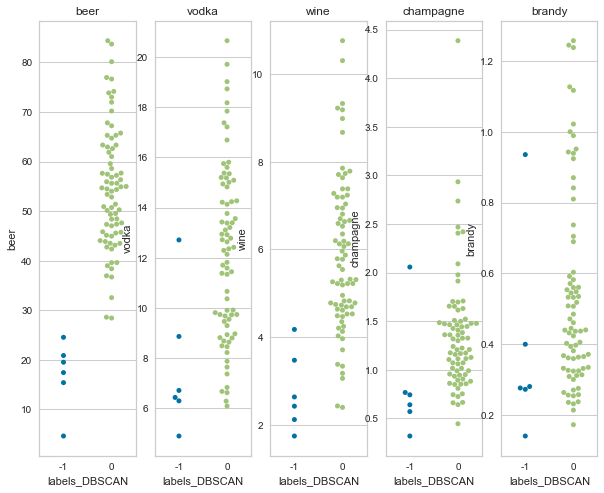

In [75]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(151)
sns.swarmplot(x="labels_DBSCAN", y="beer", data=X1, ax=ax1)
ax1.set_title("beer")

ax2 = fig.add_subplot(152)
sns.swarmplot(x="labels_DBSCAN", y="vodka", data=X1, ax=ax2)
ax2.set_title("vodka")

ax3 = fig.add_subplot(153)
sns.swarmplot(x="labels_DBSCAN", y="wine", data=X1, ax=ax3)
ax3.set_title("wine")

ax4 = fig.add_subplot(154)
sns.swarmplot(x="labels_DBSCAN", y="champagne", data=X1, ax=ax4)
ax4.set_title("champagne")

ax5 = fig.add_subplot(155)
sns.swarmplot(x="labels_DBSCAN", y="brandy", data=X1, ax=ax5)
ax5.set_title("brandy")

plt.show()

Total drinks swarm plot¶
To summarise our findings let's visualize total alcohol consumption and clusters. It is now clear the hypothesis was true about the orange to begin at the top of the ladder.

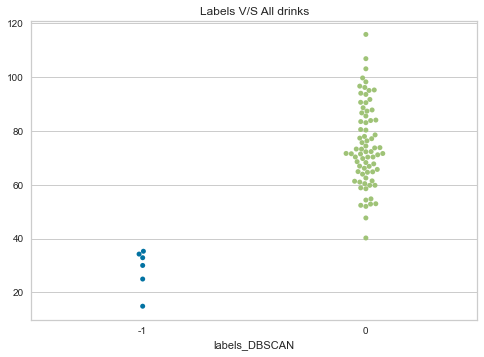

In [76]:
com_X = X1["beer"] + X1["wine"] + X1["champagne"] + X1["vodka"] + X1["brandy"]
sns.swarmplot(x="labels_DBSCAN", y=com_X, data=X1)
plt.title("Labels V/S All drinks");

Categorizing Clusters
It's time to add both the Kmeans cluster and Hierarchical cluster into our main database.

creating a new column "labels_3" and adding agglo cluster prediction.
renaming numerical values to categories based on popularity.
Filtering out to see top 2 values.

In [70]:
# total alcohol level
X1['total_alc'] = X1.apply(lambda x: x.wine + x.beer + x.vodka + x.champagne + x.brandy, axis=1)

In [71]:
X1

,wine,beer,vodka,champagne,brandy,Labels,Labels_KM,labels_DBSCAN,labels_agg,total_alc
region,,,,,,,,,,
Altai Krai,3.174211,48.373158,9.465789,1.207368,0.236842,0,1,0,0,62.457368
Altai Republic,5.190000,36.724211,9.683684,0.934737,0.253684,0,1,0,0,52.786316
Amur Oblast,5.221579,53.377368,14.216842,1.115789,0.396842,1,1,0,0,74.328421
Arkhangelsk Oblast,8.670000,47.036842,17.381053,1.631053,0.870526,0,1,0,0,75.589474
Astrakhan Oblast,4.469474,54.695263,9.296842,0.861579,0.361053,1,1,0,0,69.684211
...,...,...,...,...,...,...,...,...,...,...
Vologda Oblast,9.328421,67.206842,17.217895,0.857368,0.517895,1,2,0,1,95.128421
Voronezh Oblast,4.637895,54.911053,9.916316,1.500000,0.402105,1,1,0,0,71.367368
Yamalo-Nenets Autonomous Okrug,5.312105,80.137895,15.093158,1.485789,0.951579,1,2,0,1,102.980526


In [72]:
data= X1.drop(["Labels"],axis =1)
data

,wine,beer,vodka,champagne,brandy,Labels_KM,labels_DBSCAN,labels_agg,total_alc
region,,,,,,,,,
Altai Krai,3.174211,48.373158,9.465789,1.207368,0.236842,1,0,0,62.457368
Altai Republic,5.190000,36.724211,9.683684,0.934737,0.253684,1,0,0,52.786316
Amur Oblast,5.221579,53.377368,14.216842,1.115789,0.396842,1,0,0,74.328421
Arkhangelsk Oblast,8.670000,47.036842,17.381053,1.631053,0.870526,1,0,0,75.589474
Astrakhan Oblast,4.469474,54.695263,9.296842,0.861579,0.361053,1,0,0,69.684211
...,...,...,...,...,...,...,...,...,...
Vologda Oblast,9.328421,67.206842,17.217895,0.857368,0.517895,2,0,1,95.128421
Voronezh Oblast,4.637895,54.911053,9.916316,1.500000,0.402105,1,0,0,71.367368
Yamalo-Nenets Autonomous Okrug,5.312105,80.137895,15.093158,1.485789,0.951579,2,0,1,102.980526


In [73]:
#encoded
data["Labels_KM"].replace({0:"Medium",2:"High", 1:"Low"}, inplace=True)
data["labels_agg"].replace({1:"High",2:"Medium", 0:"Low"}, inplace=True)
data["labels_DBSCAN"].replace({0:"High", -1:"Low"}, inplace=True)

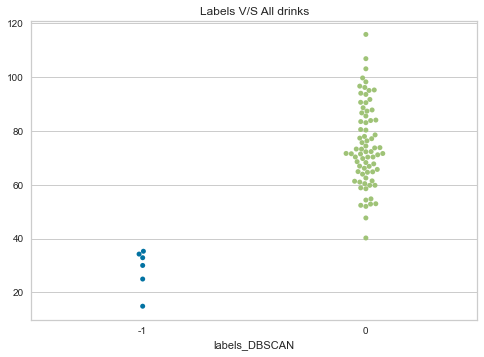

In [74]:
# checking to see the most clussters
com_X = X1["beer"] + X1["wine"] + X1["champagne"] + X1["vodka"] + X1["brandy"]
sns.swarmplot(x="labels_DBSCAN", y=com_X, data=X1)
plt.title("Labels V/S All drinks");

 We will use this two columns to determine the top cities similar to Saint Petersburg

In [77]:
## Sorting for the best 10
data[data["labels_DBSCAN"] == "High"].sort_values("total_alc", ascending=False).head(11)

,wine,beer,vodka,champagne,brandy,Labels_KM,labels_DBSCAN,labels_agg,total_alc
region,,,,,,,,,
Moscow,7.381579,83.688421,19.022105,4.386316,1.257895,High,High,High,115.736316
Saint Petersburg,6.952632,84.375263,11.821579,2.468947,1.117368,High,High,High,106.735789
Yamalo-Nenets Autonomous Okrug,5.312105,80.137895,15.093158,1.485789,0.951579,High,High,High,102.980526
Tyumen Oblast,5.542105,76.950000,14.825789,1.426316,0.841579,High,High,High,99.585789
Komi Republic,9.223684,65.744211,20.654211,1.697368,0.810000,High,High,High,98.129474
Khanty–Mansi Autonomous Okrug – Yugra,5.320526,73.845263,15.012105,1.446842,0.924211,High,High,High,96.548947
Chelyabinsk Oblast,6.944211,74.147368,12.943684,1.465263,0.560526,High,High,High,96.061053
Vologda Oblast,9.328421,67.206842,17.217895,0.857368,0.517895,High,High,High,95.128421
Sverdlovsk Oblast,7.382632,71.958947,13.563684,1.360526,0.689474,High,High,High,94.955263
